In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [2]:
# Processing Function

def crack_detection(img):
    '''
    Write your crack detection processing steps here
    '''
    im = img.copy()
    
    g_im = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur_im = cv2.medianBlur(g_im, 3)
    val, th = cv2.threshold(blur_im, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    _open = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel)
    
    return val, _open
    

In [22]:
# Find suitable postive image 

#label = "C:\\Users\\Rasmus\\Desktop\\Deep Learning\\concrete_data\\Positive\\{0:05d}.jpg".format(np.random.randint(1,10000))
#label = "C:\\Users\\Rasmus\\Desktop\\Deep Learning\\concrete_data\\Positive\\{0:05d}.jpg".format(6369)
label_n = "C:\\Users\\Rasmus\\Desktop\\Deep Learning\\concrete_data\\Positive\\{0:05d}.jpg".format(1045)

#img = cv2.imread(label)
img_n = cv2.imread(label_n)

#print(label)
# C:\Users\Rasmus\Desktop\Deep Learning\concrete_data\Positive\06369.jpg
#C:\Users\Rasmus\Desktop\Deep Learning\concrete_data\Positive\01045.jpg

cv2.imshow("Cracked Image", img)
#cv2.imshow("Bad Cracked Image", img_n)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
# Find suitable negative image 

#label_n = "C:\\Users\\Rasmus\\Desktop\\Deep Learning\\concrete_data\\Negative\\{0:05d}.jpg".format(np.random.randint(1,20000))
label_n = "C:\\Users\\Rasmus\\Desktop\\Deep Learning\\concrete_data\\Negative\\{0:05d}.jpg".format(12960)
img_n = cv2.imread(label_n)

print(label_n)
# C:\Users\Rasmus\Desktop\Deep Learning\concrete_data\Negative\12960.jpg
#imgn_cd = crack_detection(img_n)

cv2.imshow("Cracked Image", img_n)
#cv2.imshow("Crack Detection", imgn_cd)
cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\Rasmus\Desktop\Deep Learning\concrete_data\Negative\12960.jpg


In [23]:
# Find better names to distinguish positive and negative
th1, img_cd = crack_detection(img)
th2, imgn_cd = crack_detection(img_n)

cv2.imshow("crack", img)
cv2.imshow("crack after detection", img_cd)
cv2.imshow("no Crack", img_n)
cv2.imshow("no crack after detection", imgn_cd)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [24]:
g_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
g_img_n = cv2.cvtColor(img_n, cv2.COLOR_BGR2GRAY)


i = g_img < th1
ix = g_img_n < th2


print("Cracked image")
print(g_img[i].mean())
print(g_img[i].std(), "\n")


print("Non cracked image")
print(g_img_n[ix].mean())
print(g_img_n[ix].std())


# Good Cracked image
# 66.64079553723018
# 21.517975937073718 

# Good non-cracked image
# 179.54538985463049
# 4.576126702043907

Cracked image
66.64079553723018
21.517975937073718 

Non cracked image
155.1798103736754
21.622884908740705


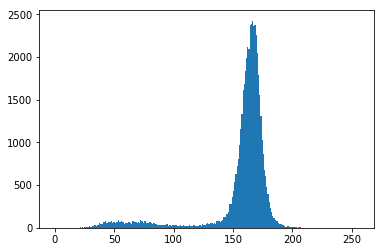

In [48]:
# FIND APPROPIATE figsize() TO MATCH IMAGES PDF IN REPORT

g_pos = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

f1 = plt.figure()
plt.hist(g_pos.ravel(),256,[0,256])
#plt.axvline(th1, color='r')



plt.show()

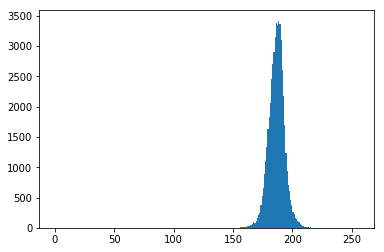

In [49]:
g_pos = cv2.cvtColor(img_n, cv2.COLOR_BGR2GRAY)

f2 = plt.figure()
plt.hist(g_pos.ravel(),256,[0,256])
#plt.axvline(th2, color='r')

plt.show()

In [51]:
f1.savefig("C:\\Users\\Rasmus\\Desktop\\Crack Detection\\report\\simple_crack_noth1.pdf", bbox_inches='tight')
f2.savefig("C:\\Users\\Rasmus\\Desktop\\Crack Detection\\report\\simple_nocrack_noth1.pdf", bbox_inches='tight')

In [38]:
# Write to .jpg


# cv2.imwrite("C:\\Users\\Rasmus\\Desktop\\Crack Detection\\report\\simple_crack1.jpg", img)
# cv2.imwrite("C:\\Users\\Rasmus\\Desktop\\Crack Detection\\report\\simple_crack_detection1.jpg", img_cd)
cv2.imwrite("C:\\Users\\Rasmus\\Desktop\\Crack Detection\\report\\bias_needed1.jpg", img_n)
cv2.imwrite("C:\\Users\\Rasmus\\Desktop\\Crack Detection\\report\\bias_needed_detection1.jpg", imgn_cd)
            

True

In [53]:
print(cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)))

[[0 1 0]
 [1 1 1]
 [0 1 0]]
